<a href="https://colab.research.google.com/github/jasonjstewart/college-football/blob/master/Naive_Bayes_4th_Down.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score


url = "https://jasonstewart.s3.amazonaws.com/LogReg+Final+CSV.csv"

dataset = pd.read_csv(url)

dataset.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,home,offense_score,defense_score,period,clock,yard_line,yards_to_goal,distance,yards_gained,ppa,plays,yards,season,week,success_or_failure
0,0,0,0,7,1,89,36,36,4,5,2.130077,12,64,2015,11,0
1,1,1,0,0,1,696,68,32,2,-10,-2.672218,6,19,2018,5,0
2,2,0,3,7,1,315,56,56,2,0,-0.589364,5,19,2015,6,0
3,3,1,14,14,2,562,65,35,11,3,-1.287230,8,25,2014,4,0
4,4,1,0,3,1,482,47,53,1,6,0.000000,11,74,2014,4,0


In [ ]:
pd.options.display.max_rows = 30
dataset.isnull().sum()

Unnamed: 0            0
home                  0
offense_score         0
defense_score         0
period                0
clock                 0
yard_line             0
yards_to_goal         0
distance              0
yards_gained          0
ppa                   0
plays                 0
yards                 0
season                0
week                  0
success_or_failure    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9363 non-null   int64  
 1   home                9363 non-null   int64  
 2   offense_score       9363 non-null   int64  
 3   defense_score       9363 non-null   int64  
 4   period              9363 non-null   int64  
 5   clock               9363 non-null   int64  
 6   yard_line           9363 non-null   int64  
 7   yards_to_goal       9363 non-null   int64  
 8   distance            9363 non-null   int64  
 9   yards_gained        9363 non-null   int64  
 10  ppa                 9363 non-null   float64
 11  plays               9363 non-null   int64  
 12  yards               9363 non-null   int64  
 13  season              9363 non-null   int64  
 14  week                9363 non-null   int64  
 15  success_or_failure  9363 non-null   int64  
dtypes: flo

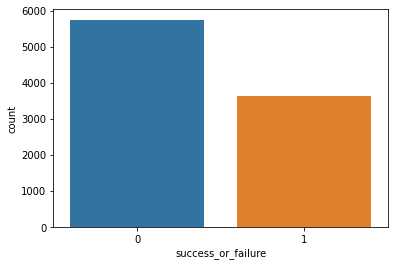

In [ ]:
sns.countplot(x='success_or_failure',data=dataset)

In [ ]:
dataset = dataset.drop(columns = ['Unnamed: 0','yards_gained','ppa'])

X=dataset.drop('success_or_failure',axis=1)
y=dataset['success_or_failure']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   home           9363 non-null   int64
 1   offense_score  9363 non-null   int64
 2   defense_score  9363 non-null   int64
 3   period         9363 non-null   int64
 4   clock          9363 non-null   int64
 5   yard_line      9363 non-null   int64
 6   yards_to_goal  9363 non-null   int64
 7   distance       9363 non-null   int64
 8   plays          9363 non-null   int64
 9   yards          9363 non-null   int64
 10  season         9363 non-null   int64
 11  week           9363 non-null   int64
dtypes: int64(12)
memory usage: 877.9 KB


In [ ]:
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=NBmodel.predict(X_test)
df1=pd.DataFrame({"Actual Status":y_test,"Predicted Status":y_pred})
df1

,Actual Status,Predicted Status
437,0,1
5119,0,0
2874,0,0
1777,0,0
6703,1,1
...,...,...
7518,1,1
2695,0,0
8687,1,1
7803,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1324,392,1716
1,252,841,1093
All,1576,1233,2809


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

77.07369170523319


In [ ]:
print("R^2 =", r2_score(y_test,y_pred))

R^2 = 0.0355045990910583


In [ ]:
from sklearn.metrics import roc_curve
probs = NBmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,preds,)
roc_auc = metrics.auc(fpr,tpr)

# calculate AUC
# falsepos,truepos,thresholds=roc_curve(y_test,NBmodel.decision_function(x_test))
# auc = roc_auc_score(y_test, y_pred)
# print('AUC: %.3f' % auc)

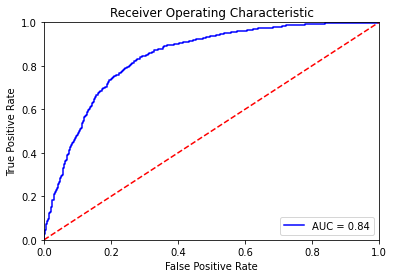

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.2292630829476682

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7705018372904924